In [1]:
#usual imports for Data Analysis
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [3]:
#usual imports for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston_data = load_boston()

In [11]:
print(boston_data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

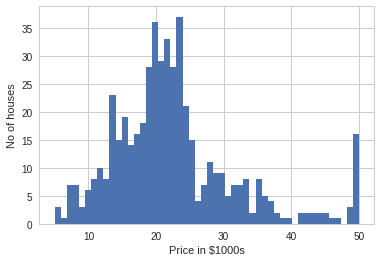

In [13]:
plt.hist(boston_data.target,bins = 50)
plt.xlabel('Price in $1000s')
plt.ylabel('No of houses')

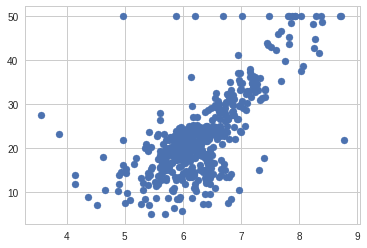

In [16]:
plt.scatter(boston_data.data[:,5],boston_data.target)

In [20]:
#converting it to a dataframe
boston_df = DataFrame(boston_data.data)

boston_df.columns = boston_data.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
boston_df['Price'] = boston_data.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


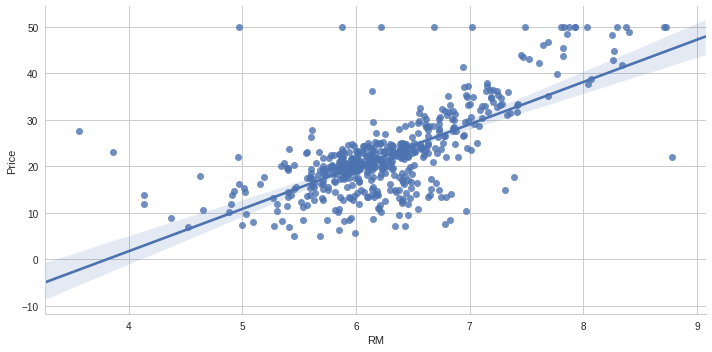

In [23]:
#this is done using seaborn, to obtain a linear fit
sns.lmplot('RM','Price',boston_df,palette = 'spring_d',aspect = 2)

In [43]:
#plotting the linear fit manually(univariate)
#y = mx + b

X = boston_df.RM
Y = boston_df.Price

In [44]:
X = np.vstack(boston_df.RM)

In [45]:
X = np.array([[value,1] for value in X])

In [46]:
#to obtain m,b for best fit line
m,b = np.linalg.lstsq(X,Y)[0]

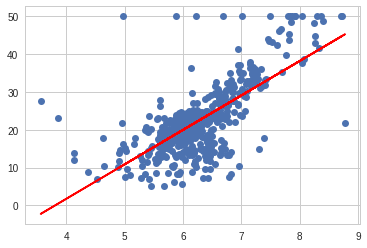

In [50]:
plt.plot(boston_df.RM,boston_df.Price,'o')

x = boston_df.RM
plt.plot(x,m*x + b,'r',label = 'BestFit')

In [51]:
#Multivariate regression
import sklearn
from sklearn.linear_model import LinearRegression


In [52]:
reg_ob = LinearRegression()

In [55]:
X_multi = boston_df.drop('Price',1)
Y_multi = boston_df.Price

In [56]:
reg_ob.fit(X_multi,Y_multi)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
reg_ob.intercept_

36.491103280364015

In [60]:
len(reg_ob.coef_)

13

In [64]:
coef_df = DataFrame(boston_df.columns)
coef_df.columns = ['Features']
coef_df['Co-efficients'] = Series(reg_ob.coef_)

In [66]:
coef_df

,Features,Co-efficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [67]:
print('The intercept estimated is %.2f'%(reg_ob.intercept_))

The intercept estimated is 36.49


In [71]:
print('The no of co-efficients is %d' %len(reg_ob.coef_))

The no of co-efficients is 13


In [101]:
#Training and testing our model
#since cross validation is not available anymore
from sklearn.model_selection import train_test_split
Train_X,Test_X,Train_Y,Test_Y = sklearn.model_selection.train_test_split(X,boston_df.Price)

In [114]:
print(Train_X.shape,Test_X.shape)

(379, 2) (127, 2)


In [115]:
lin_reg = LinearRegression()

In [116]:
lin_reg.fit(Train_X,Train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [117]:
pred_train = lin_reg.predict(Train_X)
pred_test = lin_reg.predict(Test_X)

In [107]:
Train_error = np.mean((Train_Y - pred_train)**2)
Test_error = np.mean((Test_Y - pred_test)**2)

In [108]:
print(Train_error,Test_error)

42.942253926710784 45.634432248425


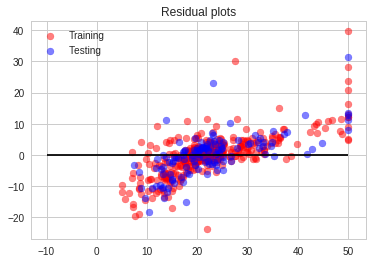

In [110]:
#plotting them 
train = plt.scatter(Train_Y,(Train_Y-pred_train),c='r',alpha = 0.5)
test = plt.scatter(Test_Y,(Test_Y-pred_test),c='b',alpha = 0.5)

plt.hlines(y = 0,xmin = -10,xmax = 50)
plt.legend((train,test),('Training','Testing'),loc = 'best')

plt.title('Residual plots')

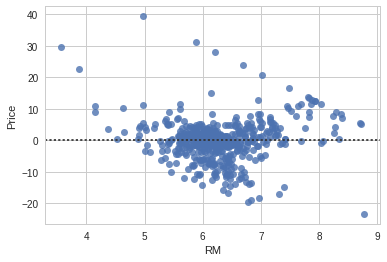

In [111]:
sns.residplot('RM','Price',data = boston_df)